In [90]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [91]:
df_08 = pd.read_csv('./all_alpha_08.csv')
df_18 = pd.read_csv('./all_alpha_18.csv')

## Number of columns per dataset

In [92]:
len(df_08.columns)

18

In [93]:
len(df_18.columns)

18

## Number of records per dataset

In [94]:
df_08.count()

Model                   2404
Displ                   2404
Cyl                     2205
Trans                   2205
Drive                   2311
Fuel                    2404
Sales Area              2404
Stnd                    2404
Underhood ID            2404
Veh Class               2404
Air Pollution Score     2404
FE Calc Appr            2205
City MPG                2205
Hwy MPG                 2205
Cmb MPG                 2205
Unadj Cmb MPG           2205
Greenhouse Gas Score    2205
SmartWay                2404
dtype: int64

In [95]:
df_18.count()

Model                   1611
Displ                   1609
Cyl                     1609
Trans                   1611
Drive                   1611
Fuel                    1611
Cert Region             1611
Stnd                    1611
Stnd Description        1611
Underhood ID            1611
Veh Class               1611
Air Pollution Score     1611
City MPG                1611
Hwy MPG                 1611
Cmb MPG                 1611
Greenhouse Gas Score    1611
SmartWay                1611
Comb CO2                1611
dtype: int64

In [96]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [97]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

## Number of duplicate rows

In [98]:
df_08.duplicated().sum()

25

In [99]:
df_18.duplicated().sum()

0

## Features with missing values

In [100]:
df_08.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [101]:
df_18.isnull().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

## Non-null unique values

In [102]:
df_08.nunique().sum()

1757

In [103]:
df_18.nunique().sum()

1217

## Count of unique fuel types

In [104]:
df_08.groupby(['Fuel']).sum()

,Displ,Unadj Cmb MPG
Fuel,,
CNG,3.6,75.0390
Gasoline,8605.4,51574.5827
diesel,49.8,187.8593
ethanol,3.3,17.1283
ethanol/gas,350.3,880.4007


In [105]:
df_18.groupby(['Fuel']).sum()

,Displ,Cyl,Air Pollution Score,Greenhouse Gas Score
Fuel,,,,
Diesel,77.6,152.0,90,218
Electricity,0.0,0.0,20,20
Ethanol/Gas,232.4,358.0,199,198
Gasoline,4561.6,8212.0,5944,6918
Gasoline/Electricity,45.0,94.0,124,236


## Drop unneeded columns

In [106]:
df_08 = df_08.drop(columns=['Stnd','Underhood ID', 'FE Calc Appr'])

In [107]:
df_18 = df_18.drop(columns=['Stnd','Stnd Description','Underhood ID'])

## Rename 'Sales Area' column in 2008 dataframe

In [108]:
df_08 = df_08.rename(columns={'Sales Area':'Cert Region'})

## Make more consistent column labels

In [109]:
df_08 = df_08.rename(columns= lambda x: x.replace(' ', '_'))
df_18 = df_18.rename(columns= lambda x: x.replace(' ', '_'))

In [110]:
df_08.count()

Model                   2404
Displ                   2404
Cyl                     2205
Trans                   2205
Drive                   2311
Fuel                    2404
Cert_Region             2404
Veh_Class               2404
Air_Pollution_Score     2404
City_MPG                2205
Hwy_MPG                 2205
Cmb_MPG                 2205
Unadj_Cmb_MPG           2205
Greenhouse_Gas_Score    2205
SmartWay                2404
dtype: int64

In [111]:
df_18.count()

Model                   1611
Displ                   1609
Cyl                     1609
Trans                   1611
Drive                   1611
Fuel                    1611
Cert_Region             1611
Veh_Class               1611
Air_Pollution_Score     1611
City_MPG                1611
Hwy_MPG                 1611
Cmb_MPG                 1611
Greenhouse_Gas_Score    1611
SmartWay                1611
Comb_CO2                1611
dtype: int64

In [112]:
df_08 = df_08.drop(columns =['Unadj_Cmb_MPG'])

In [113]:
df_18 = df_18.drop(columns=['Comb_CO2'])

# Compare columns names and make sure they're the same

In [114]:
df_08

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert_Region,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,VOLVO XC 90,3.2,(6 cyl),Auto-S6,4WD,Gasoline,CA,SUV,7,14,20,16,4,no
2400,VOLVO XC 90,4.4,(8 cyl),Auto-S6,4WD,Gasoline,CA,SUV,7,13,19,15,3,no
2401,VOLVO XC 90,3.2,(6 cyl),Auto-S6,2WD,Gasoline,FA,SUV,6,14,20,16,4,no
2402,VOLVO XC 90,3.2,(6 cyl),Auto-S6,4WD,Gasoline,FA,SUV,6,14,20,16,4,no


In [115]:
df_18

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert_Region,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,20,28,23,5,No
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,small SUV,3,19,27,22,4,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,23,33,27,6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline,FA,standard SUV,5,22,28,24,5,No
1607,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline,CA,standard SUV,5,20,27,23,5,No
1608,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline,FA,standard SUV,5,20,27,23,5,No
1609,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,standard SUV,7,26/63,30/61,27/62,10,Elite


In [116]:
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

# CHECKPOINT: SAVE EVERYTHING THUS FAR INTO A DATAFRAME

In [117]:
df_08.to_csv('./all_alpha_08.V2.csv')
df_18.to_csv('./all_alpha_18.V2.csv')

In [118]:
df_08

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert_Region,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,VOLVO XC 90,3.2,(6 cyl),Auto-S6,4WD,Gasoline,CA,SUV,7,14,20,16,4,no
2400,VOLVO XC 90,4.4,(8 cyl),Auto-S6,4WD,Gasoline,CA,SUV,7,13,19,15,3,no
2401,VOLVO XC 90,3.2,(6 cyl),Auto-S6,2WD,Gasoline,FA,SUV,6,14,20,16,4,no
2402,VOLVO XC 90,3.2,(6 cyl),Auto-S6,4WD,Gasoline,FA,SUV,6,14,20,16,4,no


## Only return records with a 'CA' cert_region

In [119]:
df_08.Cert_Region.value_counts()

FA    1157
CA    1084
FC     163
Name: Cert_Region, dtype: int64

In [120]:
df_18.Cert_Region.value_counts()

FA    813
CA    798
Name: Cert_Region, dtype: int64

In [121]:
df_08_CA = df_08.query('Cert_Region == "CA"')

In [122]:
df_18_CA = df_18.query('Cert_Region == "CA"')

In [123]:
df_08_CA.Cert_Region.value_counts()

CA    1084
Name: Cert_Region, dtype: int64

In [124]:
df_18_CA.Cert_Region.value_counts()

CA    798
Name: Cert_Region, dtype: int64

## Drop 'cert_region' column from each df, since our 'cert_region' is implied

In [125]:
df_08.drop(columns=['Cert_Region'], axis=1, inplace=True)

In [126]:
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no


In [127]:
df_18.drop(columns=['Cert_Region'], axis=1, inplace=True)

In [128]:
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3,23,33,27,6,No


## Drop records with missing values

In [129]:
x = df_18.query(f'Air_Pollution_Score == {df_18.Air_Pollution_Score.max()}').fillna(value=0)

In [130]:
df_18 = df_18.append(x)

In [131]:
df_18.query(f'Air_Pollution_Score == {df_18.Air_Pollution_Score.max()}')

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
996,KIA Soul Electric,NaN,NaN,Auto-1,2WD,Electricity,station wagon,10,124,93,108,10,Elite
997,KIA Soul Electric,NaN,NaN,Auto-1,2WD,Electricity,station wagon,10,124,93,108,10,Elite
996,KIA Soul Electric,0.0,0.0,Auto-1,2WD,Electricity,station wagon,10,124,93,108,10,Elite
997,KIA Soul Electric,0.0,0.0,Auto-1,2WD,Electricity,station wagon,10,124,93,108,10,Elite


In [132]:
df_08.dropna(inplace=True)
df_18.dropna(inplace=True)

In [133]:
df_18.query(f'Air_Pollution_Score == {df_18.Air_Pollution_Score.max()}')

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
996,KIA Soul Electric,0.0,0.0,Auto-1,2WD,Electricity,station wagon,10,124,93,108,10,Elite
997,KIA Soul Electric,0.0,0.0,Auto-1,2WD,Electricity,station wagon,10,124,93,108,10,Elite


In [134]:
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [135]:
df_08.duplicated().sum()

0

In [136]:
df_18.duplicated().sum()

0

# CHECKPOINT: SAVE EVERYTHING TO .CSV

In [137]:
df_08.to_csv('df_08_v3.csv', index=False)
df_18.to_csv('df_18_v3.csv', index=False)

In [138]:
df_08 = pd.read_csv('df_08_v3.csv')
df_18 = pd.read_csv('df_18_v3.csv')

In [139]:
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no


## Fix all datatypes

In [140]:
df_08.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Veh_Class                object
Air_Pollution_Score      object
City_MPG                 object
Hwy_MPG                  object
Cmb_MPG                  object
Greenhouse_Gas_Score     object
SmartWay                 object
dtype: object

In [141]:
df_18.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Veh_Class                object
Air_Pollution_Score       int64
City_MPG                 object
Hwy_MPG                  object
Cmb_MPG                  object
Greenhouse_Gas_Score      int64
SmartWay                 object
dtype: object

In [142]:
df_08.Cyl.value_counts()

(6 cyl)     646
(4 cyl)     455
(8 cyl)     392
(5 cyl)     109
(12 cyl)     30
(10 cyl)     15
(2 cyl)       2
(16 cyl)      1
Name: Cyl, dtype: int64

In [143]:
df_18.Cyl.value_counts()

4.0     384
6.0     259
8.0     159
3.0      18
12.0      9
5.0       2
0.0       1
16.0      1
Name: Cyl, dtype: int64

In [144]:
df_08.Cyl = df_08.Cyl.str.extract('(\d+)').astype(int)
df_08.Cyl.value_counts()

6     646
4     455
8     392
5     109
12     30
10     15
2       2
16      1
Name: Cyl, dtype: int64

In [145]:
df_18.Cyl = df_18.Cyl.astype(int)
df_18.Cyl.value_counts()

4     384
6     259
8     159
3      18
12      9
5       2
16      1
0       1
Name: Cyl, dtype: int64

# CHECKPOINT: SAVE EVERYTHING TO .CSV

In [146]:
df_08.to_csv('df_08_v4.csv', index=False)
df_18.to_csv('df_18_v4.csv', index=False)

In [147]:
df_08 = pd.read_csv('df_08_v4.csv')
df_18 = pd.read_csv('df_18_v4.csv')

In [148]:
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no


## Change datatypes in 'air_pollution' column

In [149]:
df_08.Air_Pollution_Score.value_counts()

6      940
7      490
9.5     80
6/6     32
3       31
9       23
3/3     20
8       15
7/7     12
1        6
6/4      1
Name: Air_Pollution_Score, dtype: int64

## Find records with slashed '/' values and separate them into their own separate records

#### Select all rows with records of slashed values

In [150]:
hybrid_08 = df_08[df_08.Fuel.str.contains('/')]
hybrid_08.head() 

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
209,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol/gas,SUV,7/7,11/14,15/20,12/16,6/4,no
210,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol/gas,SUV,7/7,11/14,14/19,12/16,6/4,no
214,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol/gas,SUV,6/6,11/14,15/20,12/16,6/4,no
215,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol/gas,SUV,6/6,11/14,14/19,12/16,6/4,no
262,CHEVROLET Express 1500,5.3,8,Auto-L4,4WD,ethanol/gas,van,6/6,9/12,12/16,10/14,4/2,no


In [151]:
df1 = hybrid_08.copy()
df2 = hybrid_08.copy()


In [152]:
df1

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
209,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol/gas,SUV,7/7,11/14,15/20,12/16,6/4,no
210,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol/gas,SUV,7/7,11/14,14/19,12/16,6/4,no
214,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol/gas,SUV,6/6,11/14,15/20,12/16,6/4,no
215,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol/gas,SUV,6/6,11/14,14/19,12/16,6/4,no
262,CHEVROLET Express 1500,5.3,8,Auto-L4,4WD,ethanol/gas,van,6/6,9/12,12/16,10/14,4/2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,MITSUBISHI Raider,4.7,8,Auto-L5,4WD,ethanol/gas,pickup,3/3,9/14,12/19,10/15,4/3,no
1175,NISSAN Armada,5.6,8,Auto-L5,2WD,ethanol/gas,SUV,6/6,9/12,13/18,10/14,4/2,no
1176,NISSAN Armada,5.6,8,Auto-L5,4WD,ethanol/gas,SUV,6/6,9/12,13/17,10/14,4/2,no
1211,NISSAN Titan,5.6,8,Auto-L5,2WD,ethanol/gas,pickup,6/6,9/12,13/17,10/14,4/2,no


In [153]:
df1.duplicated().sum()

0

In [154]:
df2.duplicated().sum()

0

In [155]:
columns_to_split = ['Fuel', 'Air_Pollution_Score', 'City_MPG', 'Hwy_MPG', 'Cmb_MPG', 'Greenhouse_Gas_Score']

In [156]:
for i in columns_to_split:
    df1[i] = df1[i].apply(lambda x:x.split('/')[0])
    df2[i] = df2[i].apply(lambda x:x.split('/')[1])

In [157]:
df1.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
209,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol,SUV,7,11,15,12,6,no
210,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol,SUV,7,11,14,12,6,no
214,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol,SUV,6,11,15,12,6,no
215,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol,SUV,6,11,14,12,6,no
262,CHEVROLET Express 1500,5.3,8,Auto-L4,4WD,ethanol,van,6,9,12,10,4,no


In [158]:
df2.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
209,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,gas,SUV,7,14,20,16,4,no
210,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,gas,SUV,7,14,19,16,4,no
214,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,gas,SUV,6,14,20,16,4,no
215,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,gas,SUV,6,14,19,16,4,no
262,CHEVROLET Express 1500,5.3,8,Auto-L4,4WD,gas,van,6,12,16,14,2,no


In [159]:
df1.append(df2)

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
209,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol,SUV,7,11,15,12,6,no
210,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol,SUV,7,11,14,12,6,no
214,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol,SUV,6,11,15,12,6,no
215,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol,SUV,6,11,14,12,6,no
262,CHEVROLET Express 1500,5.3,8,Auto-L4,4WD,ethanol,van,6,9,12,10,4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,MITSUBISHI Raider,4.7,8,Auto-L5,4WD,gas,pickup,3,14,19,15,3,no
1175,NISSAN Armada,5.6,8,Auto-L5,2WD,gas,SUV,6,12,18,14,2,no
1176,NISSAN Armada,5.6,8,Auto-L5,4WD,gas,SUV,6,12,17,14,2,no
1211,NISSAN Titan,5.6,8,Auto-L5,2WD,gas,pickup,6,12,17,14,2,no


In [160]:
df_08.drop(hybrid_08.index, inplace=True)
df_08 = df_08.append(df1.append(df2), ignore_index=True)

### Repeat for 2018

In [161]:
hybrid_18 = df_18[df_18.Fuel.str.contains('/')]

In [162]:
df1 = hybrid_18.copy()
df2 = hybrid_18.copy()

In [163]:
columns_to_split = ['Fuel', 'City_MPG', 'Hwy_MPG', 'Cmb_MPG']

In [164]:
for c in columns_to_split:
    df1[c] = df1[c].apply(lambda x:x.split('/')[0])
    df2[c] = df2[c].apply(lambda x:x.split('/')[1])

In [165]:
df_18.drop(hybrid_18.index, inplace=True)
df_18 = df_18.append(df1.append(df2), ignore_index=True)

In [166]:
df_18[df_18.City_MPG.str.contains('/')]

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay


In [167]:
df_08.Fuel.value_counts()

Gasoline    1575
ethanol       66
gas           65
diesel         7
CNG            2
Name: Fuel, dtype: int64

In [168]:
df_18.Fuel.value_counts()

Gasoline       783
Gas             30
Ethanol         30
Diesel          19
Electricity     13
Name: Fuel, dtype: int64

In [169]:
df_08.Fuel.value_counts()

Gasoline    1575
ethanol       66
gas           65
diesel         7
CNG            2
Name: Fuel, dtype: int64

## Gas/Gasoline?

In [170]:
gas_type_08 = df_08.query('Fuel == "gas"').copy()
gas_type_08.replace(to_replace='gas', value='Gasoline', inplace=True)
df_08.drop(gas_type_08.index, inplace=True)
df_08 = df_08.append(gas_type_08)

In [171]:
df_08.Fuel.value_counts()

Gasoline    1640
ethanol       66
diesel         7
CNG            2
Name: Fuel, dtype: int64

In [172]:
gas_type_18 = df_18.query('Fuel == "Gas"').copy()
gas_type_18.replace(to_replace='gas', value='Gasoline', inplace=True)
df_18.drop(gas_type_18.index, inplace=True)
df_18 = df_18.append(gas_type_18)

In [173]:
df_08.Fuel.value_counts()

Gasoline    1640
ethanol       66
diesel         7
CNG            2
Name: Fuel, dtype: int64

## Fix `*_mpg, greenhouse_gas_score and air_pollution_score` datatypes

In [174]:
df_08.dtypes

Model                    object
Displ                   float64
Cyl                       int64
Trans                    object
Drive                    object
Fuel                     object
Veh_Class                object
Air_Pollution_Score      object
City_MPG                 object
Hwy_MPG                  object
Cmb_MPG                  object
Greenhouse_Gas_Score     object
SmartWay                 object
dtype: object

In [175]:
df_18.dtypes

Model                    object
Displ                   float64
Cyl                       int64
Trans                    object
Drive                    object
Fuel                     object
Veh_Class                object
Air_Pollution_Score       int64
City_MPG                 object
Hwy_MPG                  object
Cmb_MPG                  object
Greenhouse_Gas_Score      int64
SmartWay                 object
dtype: object

In [176]:
df_08.City_MPG = df_08.City_MPG.astype(int)
df_08.Hwy_MPG = df_08.Hwy_MPG.astype(int)
df_08.Cmb_MPG = df_08.Cmb_MPG.astype(int)

df_18.City_MPG = df_18.City_MPG.astype(int)
df_18.Hwy_MPG = df_18.Hwy_MPG.astype(int)
df_18.Cmb_MPG = df_18.Cmb_MPG.astype(int)


In [177]:
df_08.dtypes == df_18.dtypes

Model                    True
Displ                    True
Cyl                      True
Trans                    True
Drive                    True
Fuel                     True
Veh_Class                True
Air_Pollution_Score     False
City_MPG                 True
Hwy_MPG                  True
Cmb_MPG                  True
Greenhouse_Gas_Score    False
SmartWay                 True
dtype: bool

In [178]:
df_08.Air_Pollution_Score = df_08.Air_Pollution_Score.astype(float).astype(int)
df_08.Greenhouse_Gas_Score = df_08.Greenhouse_Gas_Score.astypes(int)

AttributeError: 'Series' object has no attribute 'astypes'

In [179]:
df_08.Greenhouse_Gas_Score.value_counts()

6     471
7     284
5     279
4     271
3     127
8     112
2     105
0      25
1      19
9      18
10      4
Name: Greenhouse_Gas_Score, dtype: int64

In [180]:
df_08.Air_Pollution_Score.value_counts()

6    1005
7     514
9     103
3      71
8      15
1       6
4       1
Name: Air_Pollution_Score, dtype: int64

In [181]:
df_08.dtypes == df_18.dtypes

Model                    True
Displ                    True
Cyl                      True
Trans                    True
Drive                    True
Fuel                     True
Veh_Class                True
Air_Pollution_Score      True
City_MPG                 True
Hwy_MPG                  True
Cmb_MPG                  True
Greenhouse_Gas_Score    False
SmartWay                 True
dtype: bool

# CHECKPOINT: SAVE EVERYTHING

In [182]:
df_08.to_csv('df_08_v5.csv', index=False)
df_18.to_csv('df_18_v5.csv', index=False)

df_08 = pd.read_csv('df_08_v5.csv')
df_18 = pd.read_csv('df_18_v5.csv')

In [183]:
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no


# Create visuals of findings

## Fix `greenhouse_gas_score, air_pollution_score` datatypes

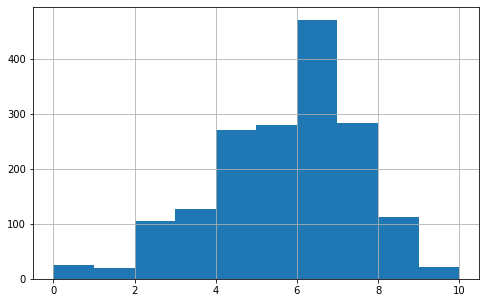

In [184]:
df_08.Greenhouse_Gas_Score.hist(figsize=(8, 5));

In [185]:
df_08.Greenhouse_Gas_Score.value_counts()

6     471
7     284
5     279
4     271
3     127
8     112
2     105
0      25
1      19
9      18
10      4
Name: Greenhouse_Gas_Score, dtype: int64

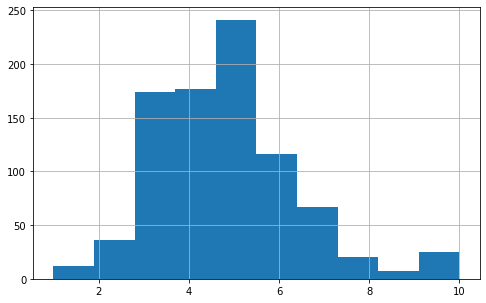

In [186]:
df_18.Greenhouse_Gas_Score.hist(figsize=(8, 5));

In [187]:
df_18.Greenhouse_Gas_Score.value_counts()

5     241
4     177
3     174
6     116
7      67
2      36
10     25
8      20
1      12
9       7
Name: Greenhouse_Gas_Score, dtype: int64

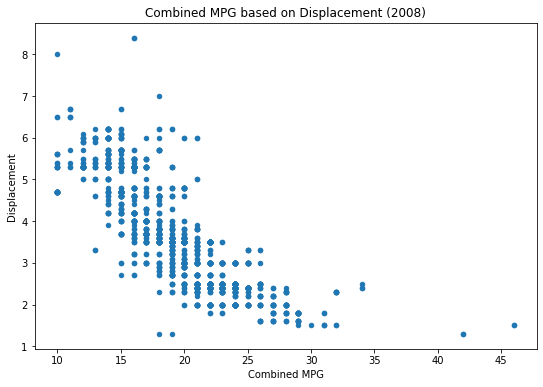

In [188]:
df_08.plot(kind='scatter', x='Cmb_MPG', y='Displ', figsize=(9,6))
plt.title('Combined MPG based on Displacement (2008)')
plt.xlabel('Combined MPG')
plt.ylabel('Displacement');

## How many more car models use alternative fuels in 2018 as opposed to 2008?
* ### May need to Google the answer to find out which fuel types are considered 'alternative'

In [189]:
alt_fuels_08 = df_08.query('Fuel in ["CNG", "Ethanol"]').Model
alt_fuels_08.nunique()

1

In [190]:
alt_fuels_18 = df_18.query('Fuel in ["Electricity", "Ethanol"]').Model
alt_fuels_18.nunique()

29

In [191]:
print(f'There are {(alt_fuels_18.nunique())-(alt_fuels_08.nunique())} more vehicles that uses alternative fuels.')

There are 28 more vehicles that uses alternative fuels.


## How much has the average fuel economy improved since 2008?

In [192]:
fuel_eco_08 = df_08.Cmb_MPG.mean()
fuel_eco_18 = df_18.Cmb_MPG.mean()

In [193]:
print(f"Fuel efficiency in 2018 is greater than 2008 by {round((fuel_eco_18 - fuel_eco_08), 2)} MPG")

Fuel efficiency in 2018 is greater than 2008 by 4.53 MPG


## Which type of vehicle's fuel economy has improved the most since 2008?

In [194]:
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no


In [195]:
df_08.Veh_Class.value_counts()

SUV              508
small car        504
pickup           217
midsize car      216
large car        108
station wagon     90
van               37
minivan           35
Name: Veh_Class, dtype: int64

In [196]:
fuel_eco_08 = df_08.copy()
fuel_eco_18 = df_18.copy()

fuel_eco_18.drop(fuel_eco_18.query('Veh_Class == "special purpose"').index, inplace=True)

In [197]:
df_18.Veh_Class.value_counts()

small car          296
midsize car        146
small SUV          117
standard SUV        90
large car           89
pickup              78
station wagon       40
special purpose     14
minivan              5
Name: Veh_Class, dtype: int64

In [198]:
fuel_eco_18.query('Veh_Class == "special purpose"')

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay


In [199]:
fuel_eco_18[fuel_eco_18['Veh_Class'] == 'small SUV'].copy()

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
11,ALFA ROMEO Stelvio AWD,2.0,4,Auto-8,4WD,Gasoline,small SUV,3,22,28,24,5,No
30,AUDI Q5,2.0,4,SemiAuto-7,4WD,Gasoline,small SUV,3,23,27,25,5,No
39,AUDI SQ5,3.0,6,AMS-8,4WD,Gasoline,small SUV,5,19,24,21,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Electricity,small SUV,7,60,58,59,10,Elite
857,DODGE Journey,3.6,6,Auto-6,2WD,Gas,small SUV,3,17,25,19,3,No
867,JEEP Cherokee,2.4,4,Auto-9,2WD,Gas,small SUV,3,21,30,25,5,No
868,JEEP Cherokee,2.4,4,Auto-9,4WD,Gas,small SUV,3,21,28,23,5,No


In [201]:
columns = ['small SUV', 'standard SUV']

for c in columns:
    records = fuel_eco_18[fuel_eco_18['Veh_Class'] == c].copy()
    records.replace(to_replace=c, value='SUV', inplace=True)
    fuel_eco_18.drop(fuel_eco_18[fuel_eco_18['Veh_Class'] == c].index, inplace=True)
    fuel_eco_18 = fuel_eco_18.append(records)

In [202]:
fuel_eco_18.Veh_Class.value_counts()

small car        296
SUV              207
midsize car      146
large car         89
pickup            78
station wagon     40
minivan            5
Name: Veh_Class, dtype: int64

In [203]:
records = fuel_eco_18[fuel_eco_18['Veh_Class'] == 'minivan'].copy()
records.replace(to_replace='minivan', value='van', inplace=True)
fuel_eco_18.drop(fuel_eco_18[fuel_eco_18['Veh_Class'] == 'minivan'].index, inplace=True)
fuel_eco_18 = fuel_eco_18.append(records)

In [204]:
fuel_eco_18.Veh_Class.value_counts()

small car        296
SUV              207
midsize car      146
large car         89
pickup            78
station wagon     40
van                5
Name: Veh_Class, dtype: int64

In [205]:
fuel_eco_08.Veh_Class.value_counts()

SUV              508
small car        504
pickup           217
midsize car      216
large car        108
station wagon     90
van               37
minivan           35
Name: Veh_Class, dtype: int64

In [206]:
records = fuel_eco_08[fuel_eco_08['Veh_Class'] == 'minivan'].copy()
records.replace(to_replace='minivan', value='van', inplace=True)
fuel_eco_08.drop(fuel_eco_08[fuel_eco_08['Veh_Class'] == 'minivan'].index, inplace=True)
fuel_eco_08 = fuel_eco_08.append(records)

In [208]:
fuel_eco_08.Veh_Class.value_counts()

SUV              508
small car        504
pickup           217
midsize car      216
large car        108
station wagon     90
van               72
Name: Veh_Class, dtype: int64

#### (2008) Average fuel economy by vehicle type

In [212]:
vt_fuel_eco_08 = round(fuel_eco_08.groupby('Veh_Class').City_MPG.mean(), 2)
vt_fuel_eco_08

Veh_Class
SUV              16.06
large car        16.10
midsize car      18.98
pickup           14.37
small car        18.95
station wagon    19.91
van              14.08
Name: City_MPG, dtype: float64

#### (2018) Average fuel economy by vehicle type

In [213]:
vt_fuel_eco_18 = round(fuel_eco_18.groupby('Veh_Class').City_MPG.mean(),2)
vt_fuel_eco_18

Veh_Class
SUV              19.21
large car        20.36
midsize car      24.82
pickup           16.55
small car        22.41
station wagon    27.10
van              18.00
Name: City_MPG, dtype: float64

In [215]:
fuel_eco_18.query('Veh_Class == "station wagon"')

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
44,AUDI allroad quattro,2.0,4,AMS-7,4WD,Gasoline,station wagon,5,22,30,25,5,No
59,BMW 330i Sports Wagon,2.0,4,SemiAuto-8,4WD,Gasoline,station wagon,7,23,33,27,6,No
205,CHEVROLET Sonic 5,1.4,4,Man-6,2WD,Gasoline,station wagon,3,28,37,32,7,Yes
206,CHEVROLET Sonic 5,1.4,4,SemiAuto-6,2WD,Gasoline,station wagon,3,27,35,30,7,Yes
253,FIAT 500L,1.4,4,Auto-6,2WD,Gasoline,station wagon,3,22,30,25,5,No
339,HONDA Fit,1.5,4,CVT,2WD,Gasoline,station wagon,7,33,40,36,8,Yes
340,HONDA Fit,1.5,4,Man-6,2WD,Gasoline,station wagon,3,29,36,31,7,Yes
341,HONDA Fit,1.5,4,SCV-7,2WD,Gasoline,station wagon,7,31,36,33,8,Yes
342,HONDA HR-V,1.8,4,CVT,2WD,Gasoline,station wagon,3,28,34,31,7,Yes
343,HONDA HR-V,1.8,4,CVT,4WD,Gasoline,station wagon,3,27,31,29,6,No


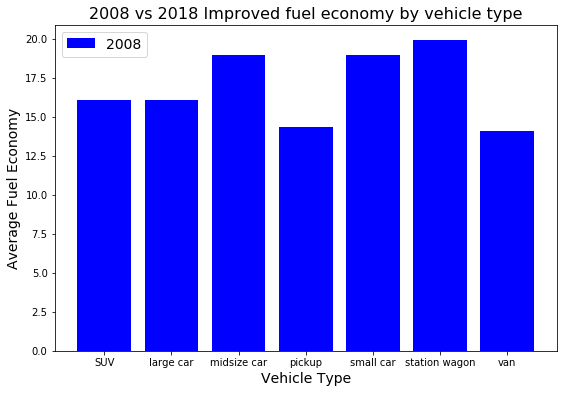

In [220]:
plt.subplots(figsize=(9,6))
plt.bar(vt_fuel_eco_08.index, vt_fuel_eco_08, color='b')
plt.title('2008 vs 2018 Improved fuel economy by vehicle type', fontsize=16)
plt.ylabel('Average Fuel Economy', fontsize=14)
plt.xlabel('Vehicle Type', fontsize =14)
plt.legend(['2008','2018'], loc='best', prop={'size':14});

## Which model has the highest `air_pollution_score` and fuel economy in 2008 and 2018? Compare them. 

In [225]:
df_08.head(0)

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay


In [221]:
df_08.Air_Pollution_Score.max()

9

In [222]:
df_18.Air_Pollution_Score.max()

10

In [226]:
df_08.Cmb_MPG.max()

46

In [228]:
df_18.Cmb_MPG.max()

108

In [245]:
df_08.query('Air_Pollution_Score == 9')

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
69,BMW 328ci,3.0,6,Man-6,2WD,Gasoline,small car,9,20,30,24,7,yes
70,BMW 328ci,3.0,6,Auto-S6,2WD,Gasoline,small car,9,23,31,25,7,yes
75,BMW 328ci Convertible,3.0,6,Man-6,2WD,Gasoline,small car,9,19,29,22,6,yes
76,BMW 328ci Convertible,3.0,6,Auto-S6,2WD,Gasoline,small car,9,20,30,24,7,yes
81,BMW 328cxi,3.0,6,Auto-S6,4WD,Gasoline,small car,9,20,27,23,7,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,VOLKSWAGEN Rabbit,2.5,5,Man-5,2WD,Gasoline,small car,9,22,29,24,7,yes
1510,VOLKSWAGEN Rabbit,2.5,5,Auto-S6,2WD,Gasoline,small car,9,21,29,24,7,yes
1511,VOLKSWAGEN Rabbit,2.5,5,Man-5,2WD,Gasoline,small car,9,22,29,24,7,yes
1531,VOLVO S40,2.4,5,Auto-S5,2WD,Gasoline,small car,9,20,28,23,7,yes


In [247]:
df_18.query('Air_Pollution_Score == 10')

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
790,KIA Soul Electric,0.0,0,Auto-1,2WD,Electricity,station wagon,10,124,93,108,10,Elite


In [230]:
air_max_08 = df_08.Air_Pollution_Score.max()
air_max_18 = df_18.Air_Pollution_Score.max()
cmb_max_08 = df_08.Cmb_MPG.max()
cmb_max_18 = df_18.Cmb_MPG.max()

In [241]:
best_ac_08 = df_08.query(f'Air_Pollution_Score == {air_max_08} and Cmb_MPG == {cmb_max_08}')
best_ac_08

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
1389,TOYOTA Prius,1.5,4,Auto-AV,2WD,Gasoline,midsize car,9,48,45,46,10,yes


In [242]:
best_ac_18 = df_18.query(f'Air_Pollution_Score == {air_max_18} and Cmb_MPG == {cmb_max_18}')
best_ac_18

,Model,Displ,Cyl,Trans,Drive,Fuel,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
790,KIA Soul Electric,0.0,0,Auto-1,2WD,Electricity,station wagon,10,124,93,108,10,Elite
